<a href="https://colab.research.google.com/github/StephRoos/Kaggle_Survey/blob/main/2021_Kaggle_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis and Visualization

In [354]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import seaborn as sns
import itertools
import lightgbm as lgb
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [355]:
df = pd.read_csv('https://raw.githubusercontent.com/StephRoos/Kaggle_Survey/main/kaggle_survey_2021_responses.csv')
df_q = df.iloc[0, :].T
df_a = df.iloc[1:, :]

In [356]:
df_a.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
df_a.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_8                           24953
Q38_B_Part_9                           25307
Q38_B_Part_10                          23226
Q38_B_Part_11                          21431
Q38_B_OTHER                            25596
Length: 369, dtype: int64

In [358]:
df_a.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25973,25973,25973,25973,25973,25973,25973,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377
unique,5409,11,5,66,7,15,7,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377


## Age Distribution of Kagglers

In [359]:
# Create a table with age distribution by gender

df_age_gender = df_a[['Q1', 'Q2']].value_counts().reset_index()
df_age_gender.columns = ['Age', 'Gender', 'Counts']
df_age_gender = df_age_gender[df_age_gender['Gender'].isin(['Man', 'Woman'])]
df_age_gender = pd.pivot(data=df_age_gender, index='Age', columns='Gender', values='Counts')

In [360]:
df_age_gender

Gender,Man,Woman
Age,,
18-21,3696,1117
22-24,3643,963
25-29,3859,994
30-34,2765,618
35-39,1993,455
40-44,1537,317
45-49,1171,175
50-54,811,136
55-59,509,72


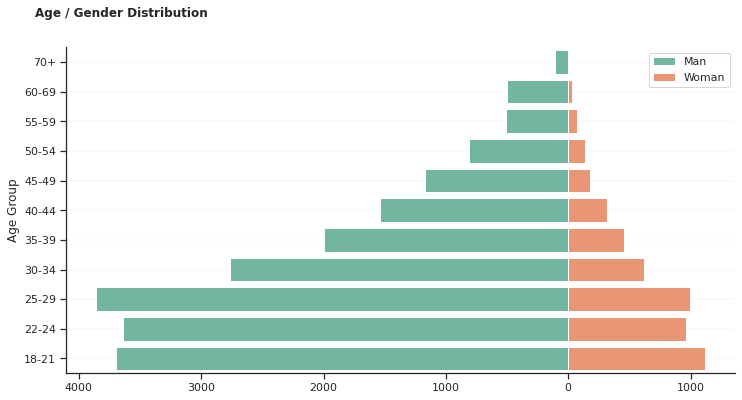

In [361]:
# Sort by age
data = df_age_gender.copy()
data.sort_index(ascending=False, inplace=True)
data['Man'] = -data['Man']

# Create a Pyramid plot with Age/Gender distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Man'], y=data.index, color='C0', label='Man')
sns.barplot(x=data['Woman'], y=data.index, color='C1', label='Woman')

ax.set_xlabel('')
ax.set_xticklabels(abs(ax.get_xticks().astype(int)))
ax.set_ylabel('Age Group')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Age / Gender Distribution', fontsize=12, fontweight='bold')   

ax.legend()
plt.show()

In 2021 Kaggle's users are dominantly by man (79.3%), and woman (18.8%).

## Kagglers around the globe

In [362]:
# Create a table with number of Kagglers by country

df_countries = pd.DataFrame(df_a.groupby('Q3', dropna = False).size())
df_countries.index.name = 'Country'
df_countries.columns = ['Kagglers']
df_countries.sort_values(by='Kagglers', ascending=False, inplace=True)
df_countries = np.round(df_countries / df_countries.sum() *100, 1)
df_countries.rename(index={'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_countries.head(10)

,Kagglers
Country,
India,28.6
USA,10.2
Other,4.9
Japan,3.5
China,3.1
Brazil,2.9
Russia,2.9
Nigeria,2.7
UK,2.1


In [363]:
data = pd.DataFrame(df_a.groupby('Q3', dropna = False).size())
data.columns = ['Kagglers']

fig = px.choropleth(data, locations=data.index,
                    locationmode = 'country names',
                    color="Kagglers", # lifeExp is a column of gapminder
                    color_continuous_scale=px.colors.sequential.Blugrn,
                    basemap_visible = True)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show()
fig.write_image("Screenshots/Map.png")

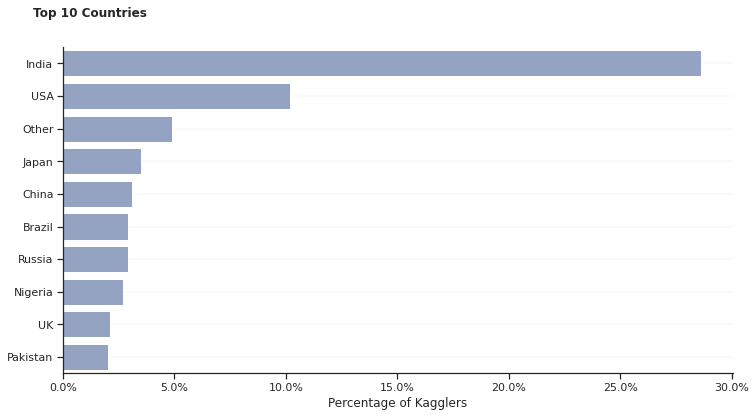

In [364]:
data = df_countries.copy()
data = data[0:10]

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Kagglers'], y=data.index, color='C2')

ax.set_xlabel('Percentage of Kagglers')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Top 10 Countries', fontsize=12, fontweight='bold')

plt.show()

India is obviously the number one country of Kagglers (28.6%). Second position is the USA (10.2%) with a big gap almost 20%, then another big gap to the 3rd place filled by users from Japan, China, Brazil, Russia and Nigeria with about the same percentage around 3%.

## Education Qualification of Kagglers

In [365]:
# Create a table with number of Kagglers by country

df_education = pd.DataFrame(df_a.groupby('Q4', dropna = False).size())
df_education.index.name = 'Education'
df_education.columns = ['Kagglers']
df_education.sort_values(by='Kagglers', ascending=False, inplace=True)
df_education = np.round(df_education/ df_education.sum() *100, 1)
df_education.rename(index={'Some college/university study without earning a bachelor’s degree': 'Some college', 'No formal education past high school':'High school'}, inplace=True)
df_education

,Kagglers
Education,
Master’s degree,39.0
Bachelor’s degree,38.1
Doctoral degree,10.8
Some college,6.7
I prefer not to answer,2.4
High school,1.6
Professional doctorate,1.4


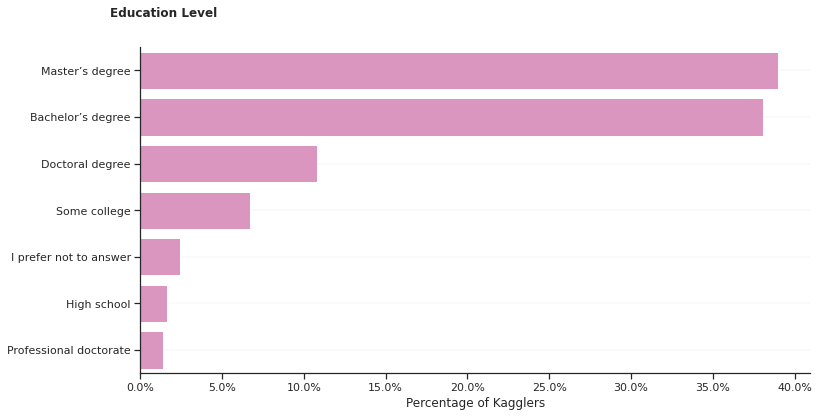

In [366]:
data = df_education.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Kagglers'], y=data.index, color='C3')

ax.set_xlabel('Percentage of Kagglers')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Education Level', fontsize=12, fontweight='bold')

plt.show()

More than 77.1% of Kagglers have master's and bachelor's degree, 12.2% have doctoral degree, 1.4% professional doctorate, 8.3% does not have a formal degree, and 1.6% has high school education.

## Current Role of Kagglers

In [367]:
# Create a table with roles of Kagglers

df_roles = pd.DataFrame(df_a.groupby('Q5', dropna = False).size())
df_roles.index.name = 'Roles'
df_roles.columns = ['Kagglers']
df_roles.sort_values(by='Kagglers', ascending=False, inplace=True)
df_roles = np.round(df_roles/ df_roles.sum() *100, 1)

In [368]:
df_roles

,Kagglers
Roles,
Student,26.2
Data Scientist,13.9
Software Engineer,9.4
Other,9.2
Data Analyst,8.9
Currently not employed,7.6
Research Scientist,5.9
Machine Learning Engineer,5.8
Business Analyst,3.7


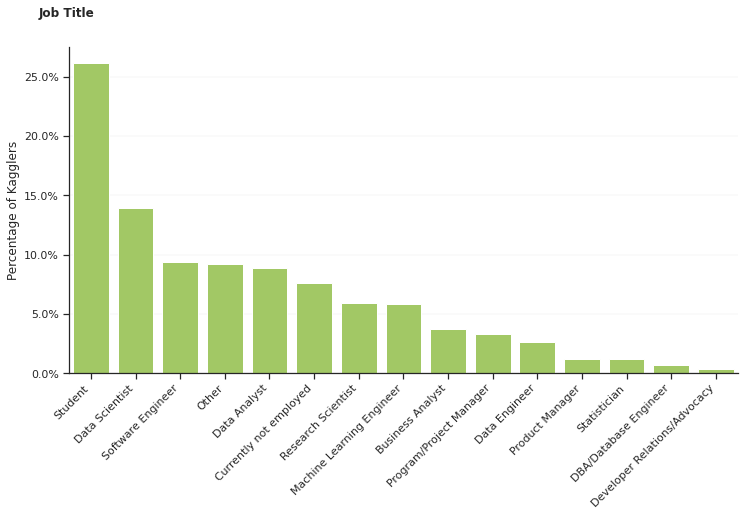

In [369]:
data = df_roles.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data.index, y=data['Kagglers'], color='C4')

ax.set_xlabel('')
ax.set_xticklabels(data.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax.set_ylabel('Percentage of Kagglers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Job Title', fontsize=12, fontweight='bold')

plt.show()

Kaggle users are mostly students (26.2%). Half of it the second job role is Data Scientist (13.9%). The third is about same percentage are software engineer and data analyst, 9.4% and 9.2% respectively.

## Industry of Profession

In [370]:
# Create a table with number of Kagglers by type of industry

df_industry = pd.DataFrame(df_a.groupby('Q20', dropna = True).size())
df_industry.index.name = 'Industry'
df_industry.columns = ['Kagglers']
df_industry.sort_values(by='Kagglers', ascending=False, inplace=True)
df_industry = np.round(df_industry/ df_industry.sum() *100, 1)
df_industry

,Kagglers
Industry,
Computers/Technology,25.0
Academics/Education,19.7
Accounting/Finance,8.9
Other,7.0
Manufacturing/Fabrication,5.3
Medical/Pharmaceutical,4.8
Government/Public Service,4.4
Online Service/Internet-based Services,3.6
Energy/Mining,3.4


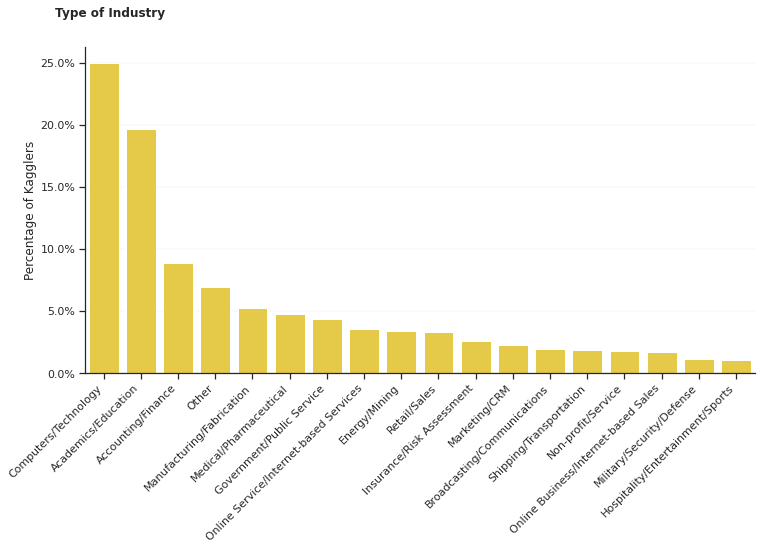

In [371]:
data = df_industry.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data.index, y=data['Kagglers'], color='C5')

ax.set_xlabel('')
ax.set_xticklabels(data.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax.set_ylabel('Percentage of Kagglers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Type of Industry', fontsize=12, fontweight='bold')

plt.show()

Since the occupation of the Kagglers are also an indicator of which Industry is demanding more of ML and AI, it is easy to co-relate both and say conclude that Computer & Technology, Academics & Education and Accounting & Finance benefit the most! then any other industries out there.

## Writing Code Experience of Kagglers

In [372]:
# Create a table with experience of Kagglers

q6_order = [
    'I have never written code', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

df_experience = df_a['Q6'].value_counts()[q6_order]
df_experience.index.name = 'Writting Code Experience'
df_experience = np.round(df_experience / df_experience.sum() *100, 1)
df_experience.columns = ['Kagglers (%)']


In [373]:
df_experience

Writting Code Experience
I have never written code     4.0
< 1 years                    22.6
1-3 years                    30.3
3-5 years                    15.6
5-10 years                   11.9
10-20 years                   8.3
20+ years                     7.2
Name: Q6, dtype: float64

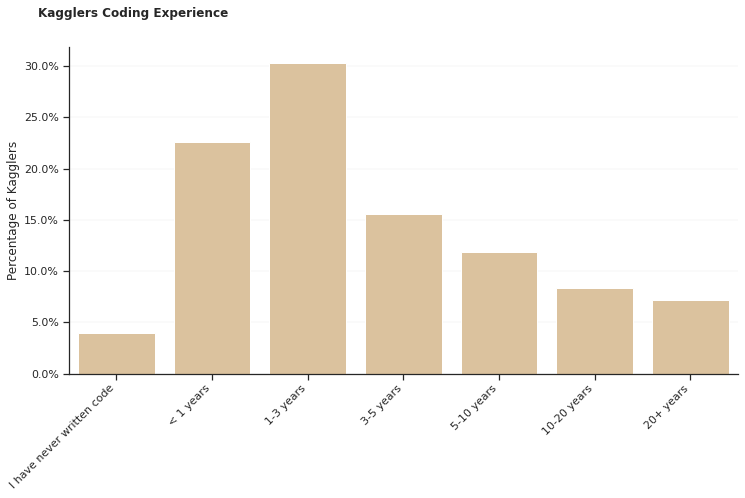

In [374]:
data = df_experience.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data.index, y=data, color='C6')

ax.set_xlabel('')
ax.set_xticklabels(data.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax.set_ylabel('Percentage of Kagglers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Kagglers Coding Experience', fontsize=12, fontweight='bold')

plt.show()

The majority of Kagglers have less than 3 years of coding experience

# Data Preprocessing

In [375]:
# Create DataFrame for Modelling

df = df_a[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q20', 'Q6', 'Q25']]
df.columns = ['Age', 'Gender', 'Country', 'Education', 'Profession', 'Industry', 'Experience', 'Salary']

df.head()

,Age,Gender,Country,Education,Profession,Industry,Experience,Salary
1,50-54,Man,India,Bachelor’s degree,Other,Manufacturing/Fabrication,5-10 years,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,20+ years,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,Academics/Education,1-3 years,$0-999
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,Academics/Education,20+ years,"30,000-39,999"
5,45-49,Man,India,Doctoral degree,Other,Academics/Education,< 1 years,"30,000-39,999"


In [376]:
features = list(df.columns[0:6])
target = df.columns[7]

print('features :', features)
print('target: ', target)


features : ['Age', 'Gender', 'Country', 'Education', 'Profession', 'Industry']
target:  Salary


## Target EDA

In [377]:
# Drop the NaN values
df = df.dropna(subset='Salary')

# Is there any student left with a salary ?
print(np.sum(df['Profession'] == 'Student'))

# Is there any unemployed kaggler left with a salary ?
print(np.sum(df['Profession'] == 'Currently not employed'))



0
0


No student or currently not employed kaggler with a salary

In [378]:
Salary_cleaned = df['Salary'].apply(lambda x: str(x).replace('$','').replace(',','').replace('>','').strip())

#create min range, max range and mean for salary
Salary_min = Salary_cleaned.apply(lambda x: int(x.split('-')[0]) if '-' in str(x) else int(x))
Salary_max = Salary_cleaned.apply(lambda x: int(x.split('-')[1]) if '-' in str(x) else int(x))
df['Salary'] = np.ceil((Salary_min + Salary_max) / 2).astype(int)


# Clean super rich
df = df[df['Salary'] < 500000]

In [379]:
df.head()

,Age,Gender,Country,Education,Profession,Industry,Experience,Salary
1,50-54,Man,India,Bachelor’s degree,Other,Manufacturing/Fabrication,5-10 years,27500
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,20+ years,65000
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,Academics/Education,1-3 years,500
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,Academics/Education,20+ years,35000
5,45-49,Man,India,Doctoral degree,Other,Academics/Education,< 1 years,35000


## Features EDA
Check if the selected features are useful for the prediction task.

### Age

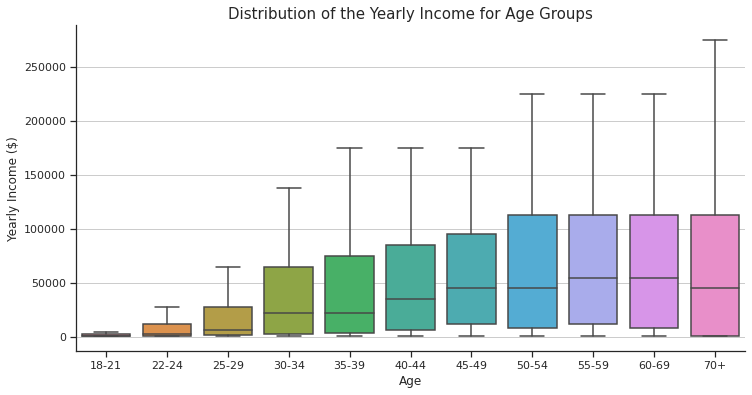

In [380]:
order = ['18-21', '22-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.boxplot(x='Age', y='Salary', data=df, order=order, showfliers=False)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.title("Distribution of the Yearly Income for Age Groups", fontsize=15)
plt.show()

The older you are, the more you earn. Until you retire. Therefore, the distribution is understandable.

In [381]:
#create mean for age
df['Age'].replace({'70+': '70'}, inplace=True)
age_min = df['Age'].apply(lambda x: int(x.split('-')[0]) if '-' in str(x) else int(x))
age_max = df['Age'].apply(lambda x: int(x.split('-')[1]) if '-' in str(x) else int(x))
df['Age'] = np.ceil((age_min + age_max) / 2).astype(int)

### Gender

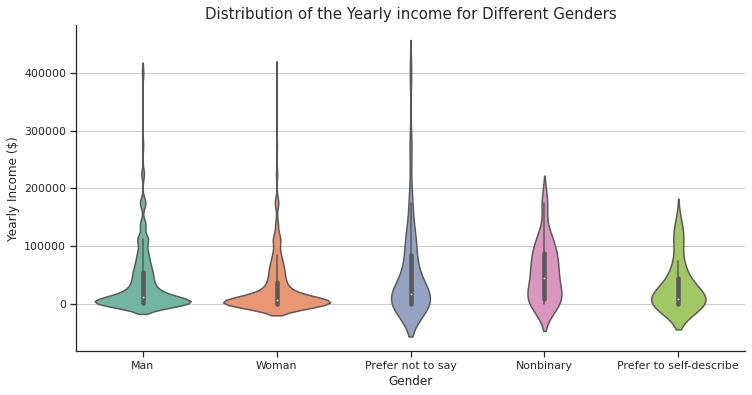

In [382]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.violinplot(x='Gender', y='Salary', data=df)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.title("Distribution of the Yearly income for Different Genders", fontsize=15)
plt.show()

The distribution of male and female salaries is quite similar so far. I will remove the other categories.

In [383]:
# Remove outliers by selecting Man and Woman only
df = df[df['Gender'].isin(['Man', 'Woman'])]

### Country

Salaries highly vary depending on the country you work in. I regroup most country by continent / region, except for the five most represented ones (USA, India, China, Russia and Brazil) Note that Asia mean Asia except India, China and Russia; that North America is Cana and Mexico only; and that South America does not count Brazil.

In [384]:
df['Country'].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Turkey', 'Australia',
       'Nigeria', 'Greece', 'Belgium', 'Egypt', 'Singapore', 'Brazil',
       'Poland', 'Iran, Islamic Republic of...', 'Japan', 'Italy',
       'United States of America', 'Viet Nam', 'Israel', 'China',
       'South Africa', 'Other', 'Bangladesh', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Tunisia', 'Argentina', 'I do not wish to disclose my location',
       'Colombia', 'Sweden', 'Chile', 'Saudi Arabia', 'Spain', 'Morocco',
       'Austria', 'Kenya', 'Canada', 'Ireland', 'Portugal',
       'Hong Kong (S.A.R.)', 'Ukraine', 'Denmark', 'Germany',
       'South Korea', 'Sri Lanka', 'Netherlands', 'Ghana', 'Malaysia',
       'Thailand', 'Nepal', 'Taiwan', 'Switzerland', 'Peru',
       'United Arab Emirates', 'Philippines', 'Algeria', 'Ethiopia',
       'Romania', 'Iraq', 'Kazakhstan', 'Uganda', 'Norway', 'Belarus',
       'Ecuador', 'Czech Republic'], dtype=object)

In [385]:
country_dic = {'Morocco': 'Africa',
               'Tunisia': 'Africa',
               'Austria': 'Europe',
               'Hong Kong (S.A.R.)': 'Asia',
               'Republic of Korea': 'Asia',
               'Thailand': 'Asia',
               'Czech Republic': 'Europe',
               'Philippines': 'Asia',
               'Romania': 'Europe',
               'Kenya': 'Africa',
               'Finland': 'Europe',
               'Norway': 'Europe',
               'Peru': 'South America',
               'Iran, Islamic Republic of...': 'Middle East',
               'Bangladesh': 'Asia',
               'New Zealand': 'Oceania',
               'Egypt': 'Africa',
               'Chile': 'South America',
               'Belarus': 'Europe',
               'Hungary': 'Europe',
               'Ireland': 'Europe',
               'Belgium': 'Europe',
               'Malaysia': 'Asia',
               'Denmark': 'Europe',
               'Greece': 'Europe',
               'Pakistan': 'Asia',
               'Viet Nam': 'Asia',
               'Argentina': 'South America',
               'Colombia': 'South America',
               'Indonesia': 'Oceania',
               'Portugal': 'Europe',
               'South Africa': 'Africa',
               'South Korea': 'Asia',
               'Switzerland': 'Europe',
               'Sweden': 'Europe',
               'Israel': 'Middle East',
               'Nigeria': 'Africa',
               'Singapore': 'Asia',
               'I do not wish to disclose my location': 'dna',
               'Mexico': 'North America',
               'Ukraine': 'Europe',
               'Netherlands': 'Europe',
               'Turkey': 'Asia',
               'Poland': 'Europe',
               'Australia': 'Oceania',
               'Italy': 'Europe',
               'Spain': 'Europe',
               'Japan': 'Asia',
               'France': 'Europe',
               'Canada': 'North America',
               'United Kingdom of Great Britain and Northern Ireland': 'Europe',
               'Germany': 'Europe',
               'Brazil': 'South America',
               'Russia': 'Russia',
               'Other': 'Other',
               'China': 'China',
               'India': 'India',
               'United States of America': 'USA',
               'Saudi Arabia' : 'Middle East',
               'Sri Lanka' : 'Asia',
               'Ghana' : 'Africa',
               'Nepal' : 'Asia',
               'Taiwan' : 'Asia',
               'United Arab Emirates' : 'Middle East',
               'Algeria' : 'Africa',
               'Ethiopia' : 'Africa',
               'Iraq' : 'Middle East',
               'Kazakhstan' : 'Asia',
               'Uganda' : 'Africa',
               'Ecuador' : 'South America'}

In [386]:
df['Country'] = df['Country'].apply(lambda x: country_dic[x])

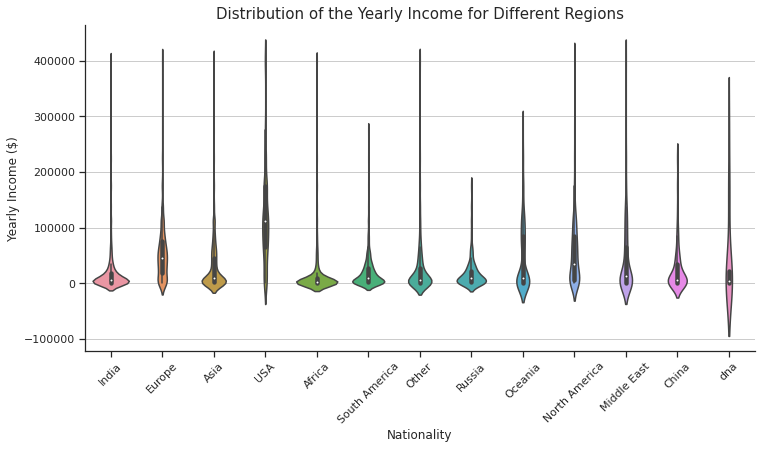

In [387]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.violinplot(x='Country', y='Salary', data=df, order=df['Country'].value_counts().index)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Nationality", fontsize=12)
plt.xticks(rotation=45)
plt.title("Distribution of the Yearly Income for Different Regions", fontsize=15)
plt.show()

As expected, North American, Oceanian and Middle East Kagglers earn a bit more. Mostly because life is not cheap the economic system permits high wages.

#### Gender wage gap in different countries

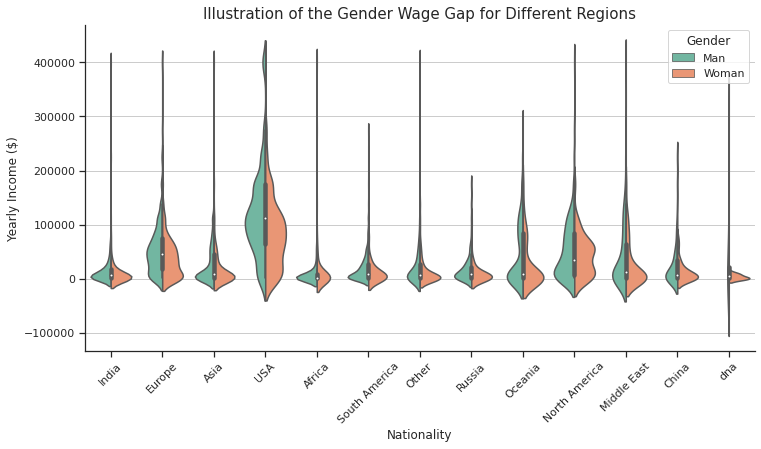

In [388]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.violinplot(x='Country', y='Salary', hue='Gender', data=df, split=True, order=df['Country'].value_counts().index)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Nationality", fontsize=12)
plt.xticks(rotation=45)
plt.title("Illustration of the Gender Wage Gap for Different Regions", fontsize=15)
plt.show()

The wage gap is visible here, and appears to be higher in Europe and in North America than in Asia. I will focus on the gender pay gap in the USA for the next visualizations.

### Education

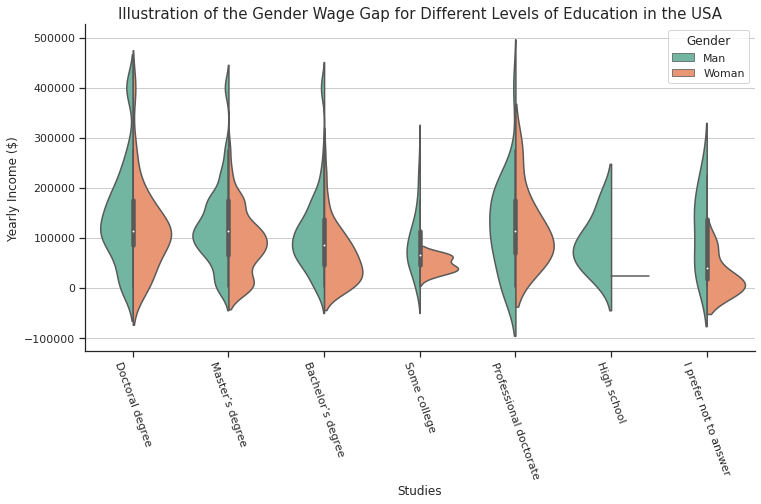

In [389]:
df_usa = df[df['Country'] == 'USA']
df_usa['Education'] = df_usa['Education'].replace(['Some college/university study without earning a bachelor’s degree', 'No formal education past high school'], ['Some college', 'High school'])

order = ['Doctoral degree', 'Master’s degree', 'Bachelor’s degree',  'Some college',
         'Professional doctorate', 'High school', 'I prefer not to answer']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.violinplot(x='Education', y='Salary', hue='Gender', data=df_usa, split=True, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Studies", fontsize=12)
plt.title("Illustration of the Gender Wage Gap for Different Levels of Education in the USA", fontsize=15)
plt.show()

This shows that the gender pay gap is not (only) caused by a difference of education in the USA, as there is differencies inside each type of studies.

### Profession

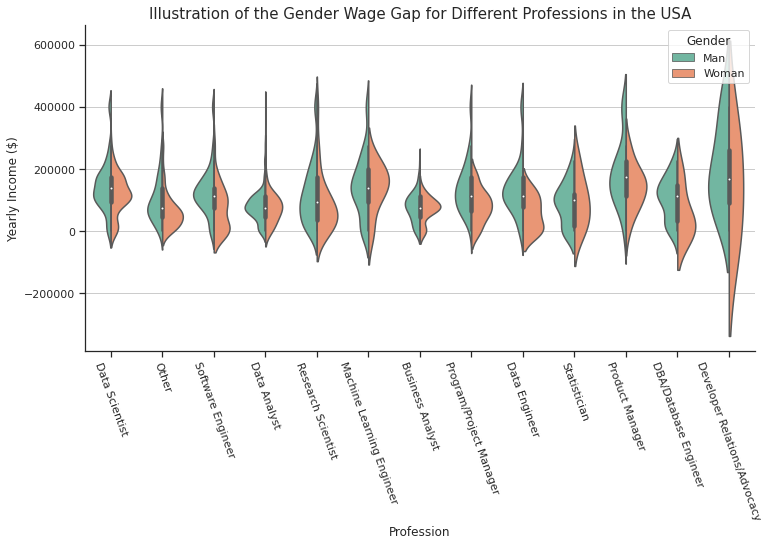

In [390]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.violinplot(x='Profession', y='Salary', hue='Gender', data=df_usa, split=True, order=df['Profession'].value_counts().index)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Illustration of the Gender Wage Gap for Different Professions in the USA", fontsize=15)
plt.show()

Inside a same job, the pay gap seems to be smaller. It is harder to directly come to a conclusion. Overall, men seem to gain more.

### Industry

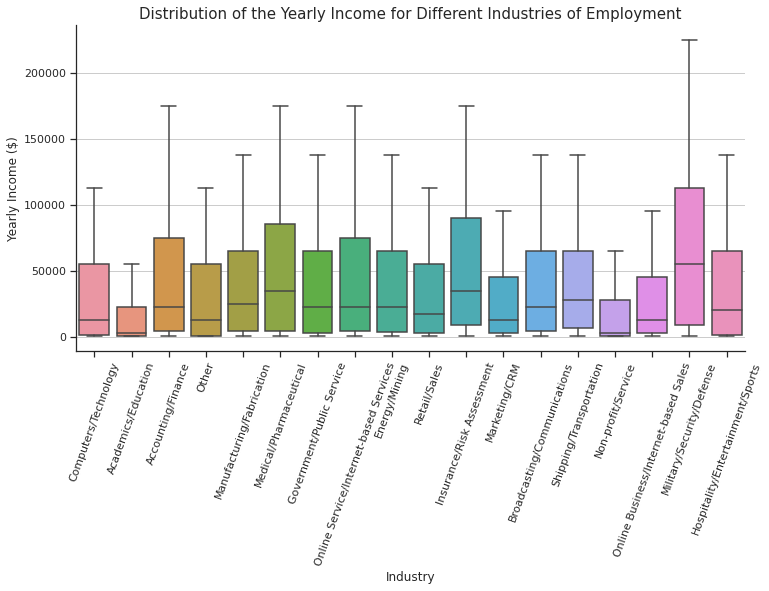

In [391]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.boxplot(x='Industry', y='Salary', data=df, order=df['Industry'].value_counts().index, showfliers=False)
plt.xticks(rotation=70)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Industry", fontsize=12)
plt.title("Distribution of the Yearly Income for Different Industries of Employment", fontsize=15)
plt.show()

I was expecting more contrasted results, but a model can definitely learn something from this.

### Experience

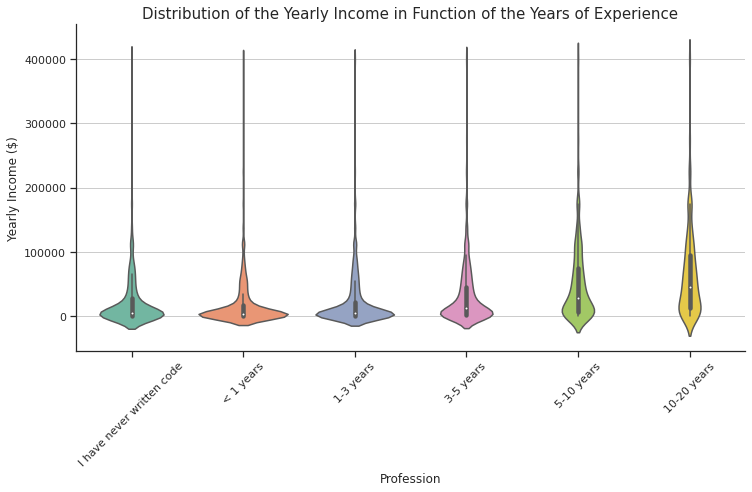

In [392]:
order = ['I have never written code', '< 1 years', '1-3 years', '3-5 years',  '5-10 years', '10-20 years']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.violinplot(x='Experience', y='Salary', data=df, order=order)
plt.xticks(rotation=45)
plt.ylabel("Yearly Income ($)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Distribution of the Yearly Income in Function of the Years of Experience", fontsize=15)
plt.show()

Once again, logical results. The salary is a strictly increasing function of your experience in the job.

In [393]:
#create numerical values for experience
dic_exp = {'I have never written code': 0, '< 1 years': 0.5, '1-3 years': 2, '3-5 years': 4, '5-10 years': 7.5, '10-20 years': 15, '20+ years': 30}
df['Experience'] = df['Experience'].apply(lambda x: dic_exp[x])

In [394]:
for q in ['Gender', 'Country', 'Education', 'Profession', 'Industry']:
    df[q] = df[q].astype('category')

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Model

## Target
Let us say we want to predict the income in thousands of USD. I will tackle the problem as a classification one. In fact, a regression one will give a bad accuracy on lower salaries. I believe it is more important to make a distinction between earn 40k and 70k than between earning 200k and 250k.

Therefore, I make 6 categories :

less than 10k
between 10k and 50k
between 50k and 80k
between 80k and 125k
more than 125k

In [395]:
classes = ['less than 10k', 'between 10k and 50k', 'between 50k and 80k', 'between 80k and 125k', 'more than 125k']

In [396]:
dic_target = {500: 0, 1500: 0, 2500: 0, 3500: 0, 4500: 0, 6250: 0, 8750: 0,
              12500: 1, 17500: 1, 22500 : 1, 27500: 1, 35000: 1, 45000 : 1,
              55000: 2, 65000: 2, 75000: 2,
              85000: 3, 95000: 3, 112500: 3,
              137500: 4, 175000: 4, 225000: 4, 275000: 4, 400000: 4
              }

df['Salary'] = df['Salary'].apply(lambda x: dic_target[x])

In [397]:
df.head()

,Age,Gender,Country,Education,Profession,Industry,Experience,Salary
1,52,0,4,0,7,8,7.5,1
2,52,0,7,3,9,8,30.0,2
3,23,0,1,3,11,0,2.0,0
4,47,0,6,1,10,0,30.0,1
5,47,0,4,1,7,0,0.5,1


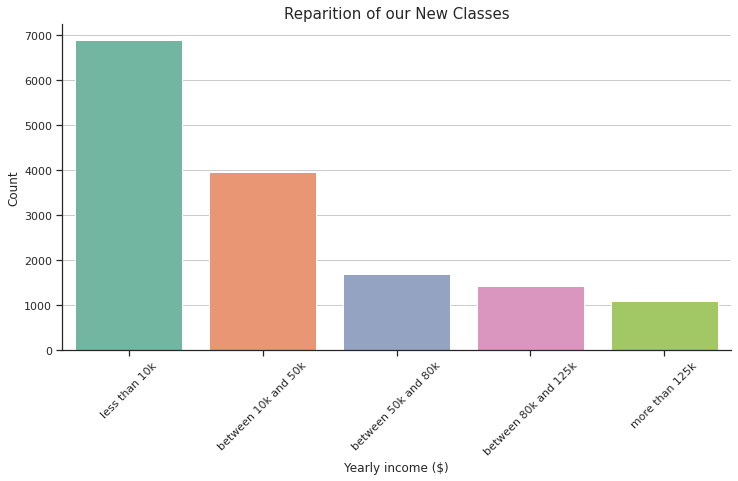

In [398]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.countplot(df['Salary'])
plt.xticks(range(0, 5), classes)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Yearly income ($)", fontsize=12)
plt.title("Reparition of our New Classes", fontsize=15)
plt.show()

## Train / Test Split

In [399]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [400]:
print(f"Training on {df_train.shape[0]} samples.")

Training on 12032 samples.


## Gradient Boosting

In [401]:
params = {"objective" : "multiclass",
              "num_class": 6,
              "metric" : "multi_error",
              "num_leaves" : 30,
              "min_child_weight" : 50,
              "learning_rate" : 0.05,
              "bagging_fraction" : 0.7,
              "feature_fraction" : 0.7,
              "bagging_seed" : 420,
              "verbosity" : -1
              }
lg_train = lgb.Dataset(df_train[features], label=(df_train["Salary"].values))
lg_test = lgb.Dataset(df_test[features], label=(df_test["Salary"].values))
model = lgb.train(params, lg_train, 1000, valid_sets=[lg_test], early_stopping_rounds=100, verbose_eval=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_error: 0.473579
[200]	valid_0's multi_error: 0.466933
[300]	valid_0's multi_error: 0.468594
Early stopping, best iteration is:
[268]	valid_0's multi_error: 0.464939


In [402]:
pred_train = model.predict(df_train[features], num_iteration=model.best_iteration)
pred_test = model.predict(df_test[features], num_iteration=model.best_iteration)

## Results

### Features Importance

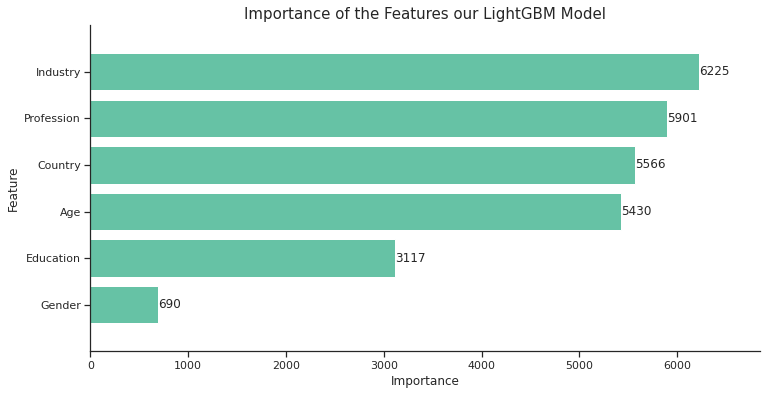

In [403]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features our LightGBM Model", fontsize=15)
plt.show()

Gender is by far the least important feature !

This does not mean that the gender pay gap does not exist, but it does show that this is not what matters when determining the salary of a Kaggler.
The profession is the most important parameter, and we have shown earlier that higher earning jobs had a higher proportion of men.

We also notice that education have little influence on earnings. It is what you do more than what you did that will determine your income.

### Confusion Matrices

In [404]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=12)
    plt.xlabel('Predicted label', size=12)

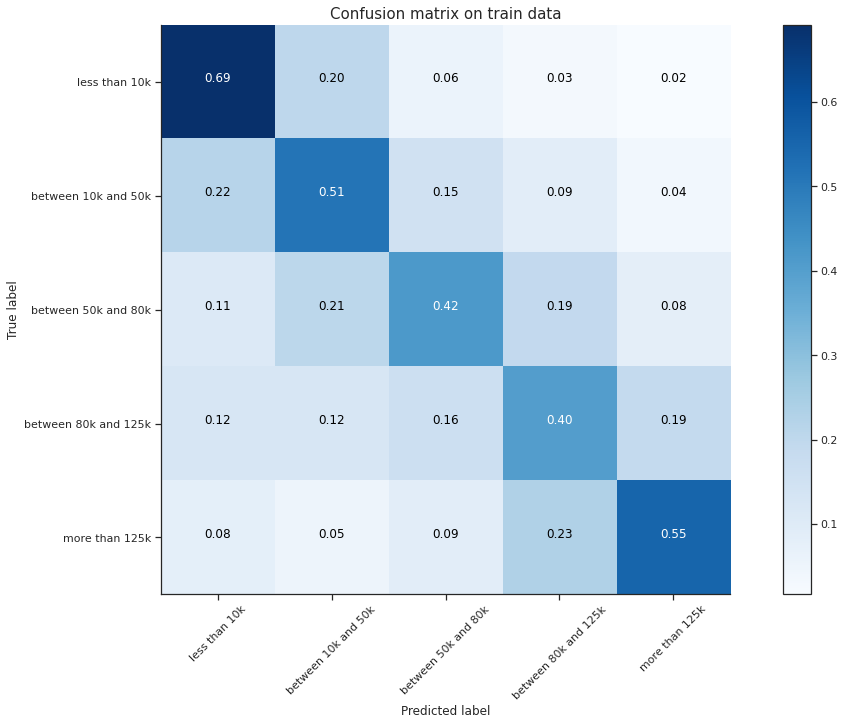

In [405]:
conf_mat_train = confusion_matrix(np.argmax(pred_train, axis=1), df_train[target].values)

plot_confusion_matrix(conf_mat_train, classes, title='Confusion matrix on train data', normalize=True)

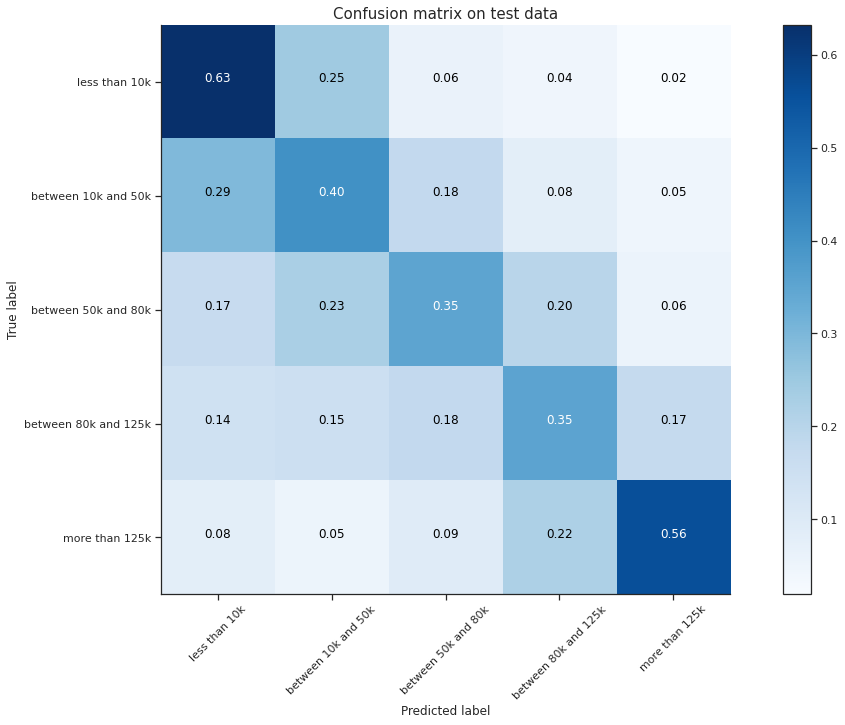

In [406]:
conf_mat_test = confusion_matrix(np.argmax(pred_test, axis=1), df_test[target].values)

plot_confusion_matrix(conf_mat_test, classes, title='Confusion matrix on test data', normalize=True)

As expected, low paid and high paid scientist are the easier to detect.